In this project we are predicting the winner of a round in the game CSGO. We are using the data from: https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification/

We will be using the machine learning algorthims Logistic regression and SVM using sklearn. 

First We import all neccessary libraries, as well as clean the data. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.svm import SVC


# Load the dataset
df = pd.read_csv('csgo_round_snapshots.csv')
df.head(3)

Now we split the data, 70/30 and train our logistic regression model. We then can evaluate the model and display our confusion matrix.

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

          CT       0.73      0.76      0.74     18054
           T       0.76      0.73      0.74     18669

    accuracy                           0.74     36723
   macro avg       0.74      0.74      0.74     36723
weighted avg       0.74      0.74      0.74     36723



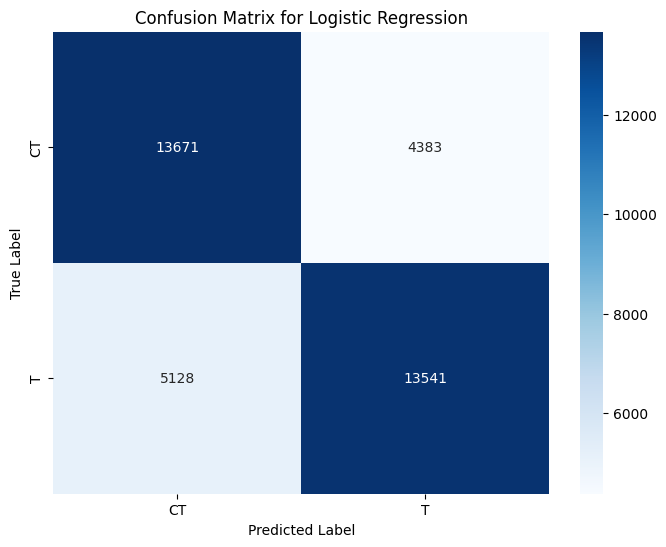

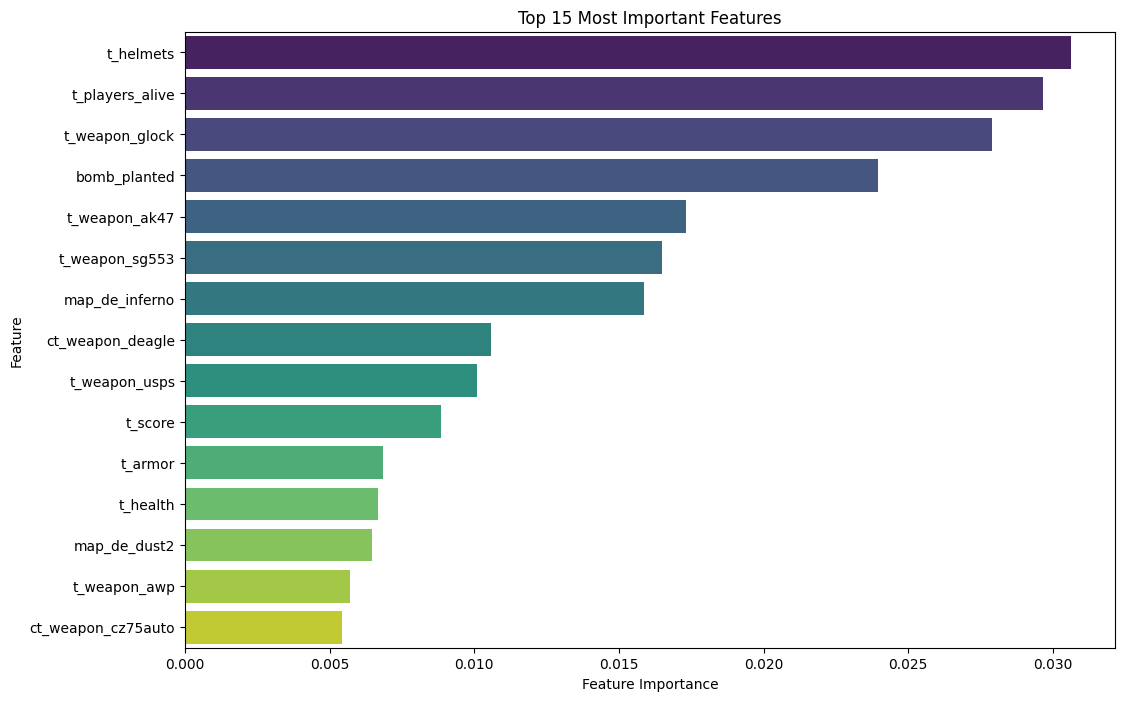

In [15]:
# Preprocess the data
df = pd.get_dummies(df, columns=['map'])

#encode bomb planted
df['bomb_planted'] = df['bomb_planted'].astype(int)

# Define features and target variable
features = df.drop(['round_winner'], axis=1)
target = df['round_winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=3000)  # or a higher value
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Feature importance
# Feature importance
feature_importance = model.coef_[0]

# Get the indices of the 15 most important features
top_indices = feature_importance.argsort()[-15:][::-1]
# Additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['CT', 'T'], yticklabels=['CT', 'T'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display feature importance in a bar chart for the top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance[top_indices], y=features.columns[top_indices], hue=features.columns[top_indices], palette="viridis", dodge=False)
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Now we will implement SVM algorithm.